

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
# prompt: upload a csv file from pc

import pandas as pd
from google.colab import files
uploaded = files.upload()



Saving customer_booking.csv to customer_booking.csv


In [ ]:
# prompt: mkdir a new directory name is data/customer_booking.csv

import os

# Create the directory if it doesn't exist
directory = 'data'
if not os.path.exists(directory):
    os.makedirs(directory)

# You can't create a file named data/customer_booking.csv like a directory.
# If you want to create a file in the data directory, do this:


# Create a file in the new directory
filepath = os.path.join(directory, 'customer_booking.csv')

# Check if the file exists
if not os.path.exists(filepath):
  # Create an empty file if it does not exist
  open(filepath, 'w').close()

  print(f"File '{filepath}' created successfully.")
else:
  print(f"File '{filepath}' already exists.")


File 'data/customer_booking.csv' created successfully.


In [ ]:
# prompt: upload a csv file from pc

import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving customer_booking.csv to customer_booking (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("your_file.csv", encoding="ISO-8859-1")
df.head()


In [ ]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")  # Replace with your filename
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
# prompt: Handle Missing Values & Data Cleaning
# Drop or fill missing values
# Convert categorical variables to numerical
# Remove duplicates

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code

# Handle Missing Values (if any)
# Check for missing values
print(df.isnull().sum())

# Method 1: Drop rows with any missing values
# df.dropna(inplace=True)

# Method 2: Fill missing values with the mean (for numerical columns)
# for col in df.select_dtypes(include=['number']):
#     df[col].fillna(df[col].mean(), inplace=True)

# Method 3: Fill missing values with the mode (for categorical columns)
# for col in df.select_dtypes(include=['object']):  # Assuming object dtype for categorical
#     df[col].fillna(df[col].mode()[0], inplace=True)


# Convert Categorical Variables to Numerical
# Method 1: One-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'], drop_first=True)

# Method 2: Label encoding (if order matters in the categories)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
#     df[col] = le.fit_transform(df[col])

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
print(df.head())
print(df.info())


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64
   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1   

In [ ]:
# prompt: Feature Engineering
# Create new relevant features
# Normalize/scale numerical data if needed
# Encode categorical variables using pd.get_dummies() or LabelEncoder

# Assuming 'df' is your DataFrame from the previous code

# Feature Engineering: Create new features
df['total_travelers'] = df['num_passengers']  # Example: Total travelers
df['travel_days_before_booking'] = df['purchase_lead'] # Example: Days before booking


# Normalize/Scale Numerical Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration', 'total_travelers', 'travel_days_before_booking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encoding is already done in the original code.  This is just an example of how to use label encoding if needed.

# Example using LabelEncoder (if one-hot encoding is not preferred for a specific column)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['flight_day'] = le.fit_transform(df['flight_day']) # Example using Label Encoding

print(df.head())


   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           0.125       0.302191        0.024422     0.304348    0.833333   
1           0.000       0.129181        0.025707     0.130435    0.833333   
2           0.125       0.280277        0.028278     0.739130    0.333333   
3           0.000       0.110727        0.039846     0.173913    0.833333   
4           0.125       0.078431        0.028278     0.652174    0.333333   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  ...  booking_origin_Tunisia  \
0         0.175983                 0  ...

## training the model now

In [ ]:
print(df.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam', 'total_travelers',
       'travel_days_before_booking'],
      dtype='object', length=916)


In [ ]:
target_column = "booking_complete"

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable (0 or 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 39424 samples
Testing set size: 9857 samples


In [ ]:
df.isnull().sum()

,0
num_passengers,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
...,...
booking_origin_United States,0
booking_origin_Vanuatu,0
booking_origin_Vietnam,0
total_travelers,0


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["booking_complete"])  # Replace with actual target column
y = df["booking_complete"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values
print(missing_values)


Series([], dtype: int64)


In [ ]:
print(X.dtypes.value_counts())  # Count of different data types


bool       904
float64      8
int64        3
Name: count, dtype: int64


In [ ]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical


In [ ]:
print(X.dtypes.unique())  # Should show only numerical types (int64, float64)


[dtype('float64') dtype('int64') dtype('bool')]


In [ ]:
  print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (49281, 915)
Target Shape: (49281,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

#

Accuracy: 0.8503
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.51      0.10      0.17      1479

    accuracy                           0.85      9857
   macro avg       0.68      0.54      0.54      9857
weighted avg       0.81      0.85      0.81      9857



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model with class weights
model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict again
y_pred = model.predict(X_test)

# Evaluate new model
from sklearn.metrics import classification_report, accuracy_score
print(f"New Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


New Accuracy: 0.8519
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.53      0.11      0.18      1479

    accuracy                           0.85      9857
   macro avg       0.70      0.55      0.55      9857
weighted avg       0.81      0.85      0.81      9857



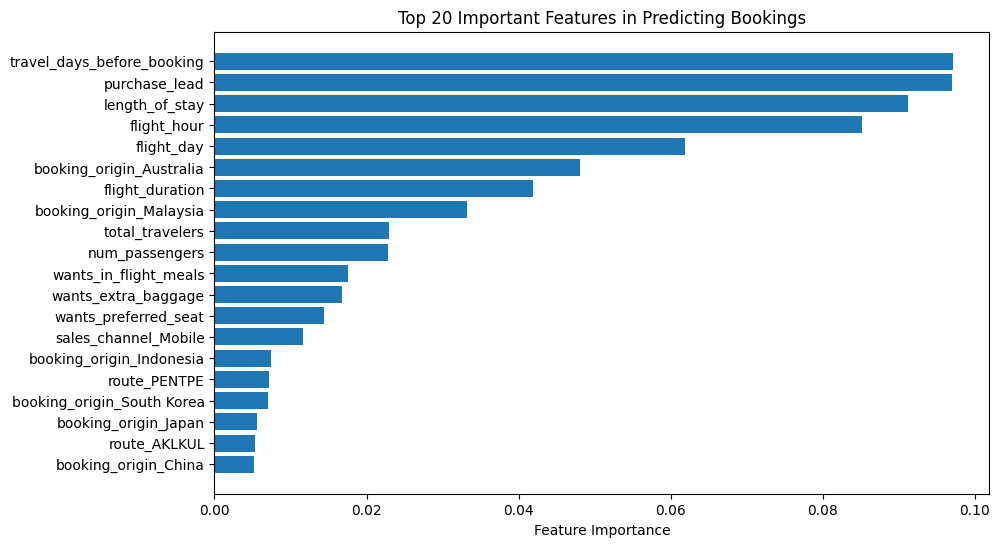

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Top 20 important features

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features in Predicting Bookings")
plt.show()


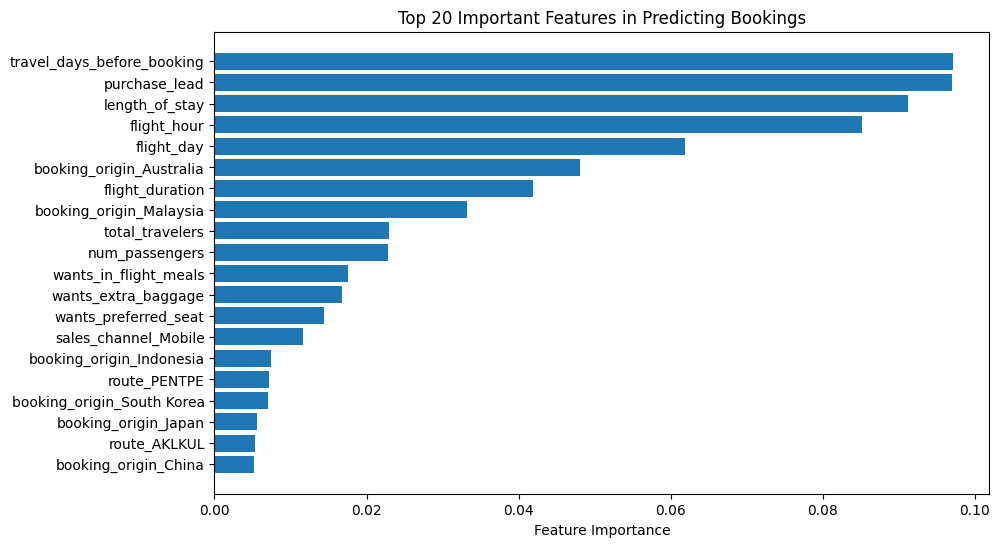

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Top 20 important features

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features in Predicting Bookings")
plt.show()
